### **NLP**

In [1]:
rawData = open("SMSSpamCollection.tsv").read()

rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [2]:
parsedData = rawData.replace("\t","\n").split("\n")    #Replace \t with \n and split from \n and return as a list

In [3]:
parsedData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [4]:
labelList = parsedData[0::2]    #taking "ham" "spam" labels
textList = parsedData[1::2]     #taking texts

In [5]:
print(labelList[0:5])
print(textList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [7]:
import pandas as pd

fullCorpus = pd.DataFrame({'label' : labelList,
                          'body_list': textList})

ValueError: All arrays must be of the same length

In [ ]:
print(len(labelList))
print(len(textList))

In [ ]:
print(labelList[-5:])

In [ ]:
labelList.remove("")

In [ ]:
print(labelList[-5:])

In [ ]:
fullCorpus = pd.DataFrame({'label' : labelList,
                          'body_list' : textList})

In [ ]:
fullCorpus

In [ ]:
dataset = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)   #header=None bcs dataset doesnt have colmn names

In [ ]:
dataset

In [8]:
fullCorpus = pd.read_csv("SMSSpamCollection.tsv", sep="\t", header=None)
fullCorpus.columns = ["label","body_text"]
fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [10]:
#What is the shape of the dataset?
print("Input data has {} rows and {} columns".format(len(fullCorpus),len(fullCorpus.columns)))

Input data has 5568 rows and 2 columns


In [11]:
#How many spam/ham are there?
print("Input data has {} ham and {} spam".format(len(fullCorpus[fullCorpus["label"] == "ham"]),
                                                 len(fullCorpus[fullCorpus["label"] == "spam"])))

Input data has 4822 ham and 746 spam


In [12]:
#How much missing data is there?
print("Number of null in label: {}".format(fullCorpus['label'].isnull().sum()))
print("Number of null in text: {}".format(fullCorpus["body_text"].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


In [13]:
#Regular Expression (Regex) = Text string for describing a search pattern

#'[j-q]' it will look for every single chars between j and q

#In order to get rid from single char problem we can use '[j-q]+' regex. It will return more than one chars

#'[0-9]+' -> if there is '2017' word. It will return the full year (2017) rather than 2-0-1-7 individually.

#'[j-q0-9]+' it will look for 'nlp2017' without spaces. It will return full words.

#Identifying whitespace between words/tokens
#Identifying creating delimiters or end-of-line espace characters
#Removing punctuation or numbers from your text
#Cleaning HTML tags from text
#Identifying some textual patterns you are interested in.

In [14]:
import re

re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This        is a made up        string to test 2    different regex-methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>>test----2"""""different-regex-methods'

In [15]:
#Identifying the whitespaces or chars seperating the words and tokenizing. re.split returns list of words.

re.split('\s', re_test)    #Looking for a only one white space.

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [16]:
re.split('\s',re_test_messy)

['This',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 'different',
 'regex-methods']

In [17]:
#To get rid of extra white spaces we will use '\s+' --- To remember '\s' only looks for single white space.

re.split('\s+',re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex-methods']

In [18]:
re.split('\s+',re_test_messy1)

['This-is-a-made/up.string*to>>>>>test----2"""""different-regex-methods']

In [19]:
#To handle special chars in text we will use '\W+' and it wil look for any non-words chars.
#and it will use this condition to split text to list.

re.split('\W+',re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [20]:
#Using split method allows us tokenize by finding the chars that the seperate words
# findall is opposite of split so if re.split('\S+') looks for one or more whitespace chars
# re.findall('\S+') will look for one or more NON whitespace chars

re.findall('\S+', re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [21]:
re.findall('\S+', re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex-methods']

In [22]:
re.findall('\S+', re_test_messy1)

['This-is-a-made/up.string*to>>>>>test----2"""""different-regex-methods']

In [23]:
#Find the all one or more word chars and ignore the all special chars and whitespaces

re.findall('\w+', re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [24]:
#2 methods to tokenizing
#findall > finds the words while ignoring all special chars and whitespaces and tokenize words that we care about
#split>finds the chars that split words. It will look for special chars and whitespaces & tokenize with using them

In [25]:
#Replacing a specific string

#Purpose of this is replacing typos (PEP8-PEP7-PEEP8 in this case).

pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

In [26]:
#Firstly we will try to create a regex to catch PEP8-PEP7-PEEP8 and after we will replace with correct

import re

re.findall('[a-z]+', pep8_test)

['try', 'to', 'follow', 'guidelines']

In [27]:
#To handle case sensivity,

re.findall('[A-Z]+', pep7_test)

['I', 'PEP']

In [28]:
#Also we need to catch numbers.

re.findall('[A-Z]+[0-9]+', peep8_test)

['PEEP8']

In [29]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep7_test)

'I try to follow PEP8 Python Styleguide guidelines'

In [30]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', pep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

In [31]:
re.sub('[A-Z]+[0-9]+', 'PEP8 Python Styleguide', peep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

### In typical ML Text pipeline;
1) Tokenize - tell the model what to look at
2) Clean text - Remove stop words/punctuation, stemming, etc.
3) Vectorize - Convert to numeric form
4) ML algorithm - Fit/train model

## Pre-processing text data
Cleaning up the text data is necessary to highlight attributes that yo are going to want your machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:

1) **Remove punctuation**
2) **Tokenization**
3) **Remove stopwords**
4) Lemmatize/Stem

In [32]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

data=pd.read_csv("SMSSpamCollection.tsv", sep='\t', header=None)
data.columns = ['label','body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [33]:
#Remove punctuation
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
"I like NLP." == "I like NLP"

False

In [35]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [36]:
#Tokenization
import re

def tokenization(text):
    return re.split('\W+', text)

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenization(x.lower()))

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [37]:
#Remove stopwords

import nltk

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return ([words for words in text if words not in stopwords])

data['removed_stopwords'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,removed_stopwords
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


# Stemming

**Crudely chopping off the end of a word, to leave only the base**

* stemming/stemmed = stem
* electricity/electrical = electr
* berries/berry = berri
* connection/connected/connective = connect

**Why do we care?**

* Reducing memory consumption
* Teach to python that words are related with each other. (grow-grew-grown)

**What are some stemmers?**

* Porter stemmer
* Snowball stemmer
* Lancaster stemmer
* Regex-based stemmer

In [38]:
ps = nltk.PorterStemmer()

In [39]:
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [40]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


In [41]:
#Stem text

def stemming(text):
    return [ps.stem(word) for word in text]

data['stemmed'] = data['removed_stopwords'].apply(lambda x: stemming(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,removed_stopwords,stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


# Lemmatizing

Using vocabulary analysis of words aiming to remove inflectional endings to return the dictionary form of a word

* Stemming is typically faster as it simply chops off the end of a words using heuristics, without any understanding of the context in which a word is used. It may or may not return a word that not in dictionary.

* Lemmatizing is typically more accurate as it uses more informed analysis to create groups of words with similar meaning based on the context around the word. And it always returns a word that in dictionary.



In [42]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [43]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [44]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

#Stemming approach algorithmic so it chop word crudely. But lemmatize check corpus and try to find relation
#if word is not in corpus it will return exactly same word. That is what happened here.

meanness
meaning


In [45]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [46]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


In [47]:
def lemmatize(text):
    return [wn.lemmatize(words) for words in text]

data['lemmatized'] = data['removed_stopwords'].apply(lambda x: lemmatize(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,removed_stopwords,stemmed,lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


# **Vectorizing**

Process of encoding text as integers to create feature vectors.

Different types:

* Count vectorization: Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occured in that document.
* N-grams vectorization
* Term frequency - inverse document frequency (TF-IDF)


In [48]:
import pandas as  pd
import re
import string
import nltk

data1 = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header = None)
data1.columns = ['label','body_text']
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokenized = re.split('\W+', text)
    c_stopwords = [words for words in tokenized if words not in stopwords]
    return [ps.stem(words) for words in c_stopwords]


data_sample = data1[0:20]
    

In [49]:
#CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data1['body_text'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [50]:
count_vect_sample = CountVectorizer(analyzer=clean_text)

X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])

print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names())

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

**Sparse Matrix:** A matrix in which more entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations the non-zero elements.

In [51]:
X_counts_sample

<20x201 sparse matrix of type '<class 'numpy.int64'>'
	with 228 stored elements in Compressed Sparse Row format>

In [52]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_counts_df.columns = count_vect_sample.get_feature_names()
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


**N-grams vectorizer**

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

"NLP is an interesting topic"

* bigram: ["nlp is", "is an", "an interesting", "interestinf topic"]
* trigram: ["nlp is an", "is an interesting", "an interesting topic"]
* four-gram: ["nlp is an interesting", "is an interesting topic"]



In [54]:
import pandas as  pd
import re
import string
import nltk

data1 = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header = None)
data1.columns = ['label','body_text']
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokenized = re.split('\W+', text)
    text = " ".join([ps.stem(words) for words in tokenized if words not in stopwords])
    return text

data1['cleaned_text'] = data1['body_text'].apply(lambda x: clean_text(x))

data1.head()

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


In [55]:
#Apply CountVectorizer (w/N-Grams)
#We will use countvectorizer here again because in n-grams also counting occurence.

from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2))    #This parameters tells the range 
X_counts = ngram_vect.fit_transform(data1['cleaned_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5568, 31275)
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q'

In [56]:
data1_sample = data1[0:20]

ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_counts_sample = ngram_vect_sample.fit_transform(data1_sample['cleaned_text'])
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

(20, 209)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'bless time', 'breather promis', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', '

In [57]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = ngram_vect_sample.get_feature_names()
X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,win fa,winner valu,wkli comp,wonder bless,wont take,word claim,word thank,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**TF-IDF**

Creates a document-term matrix where still one row per text message and the columns still represent single unique terms. But instead of the cells representing the count, the cell represent a **weighthing** thats meant to identify how important a wods is to an individual text message.
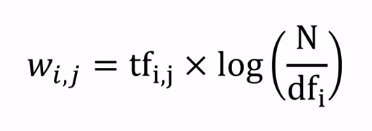
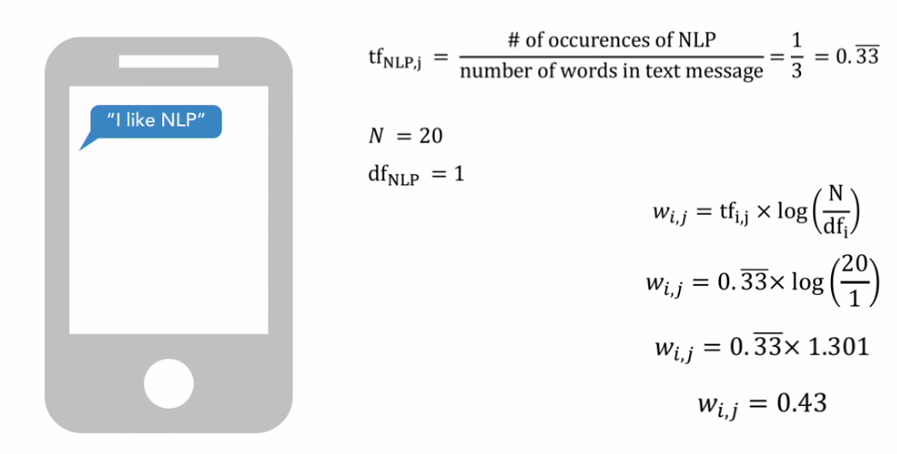


In [58]:
import pandas as  pd
import re
import string
import nltk

data1 = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header = None)
data1.columns = ['label','body_text']
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokenized = re.split('\W+', text)
    text = [ps.stem(words) for words in tokenized if words not in stopwords]
    return text



In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data1['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [60]:
data1_sample = data1[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data1_sample['body_text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 201)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'anymor', 'appli', 'ard', 'around', 'b', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'fulfil', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'grant', 'ha', 'help', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'mon

In [61]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())

X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,winner,wkli,wonder,wont,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.238737,0.238737,0.209853,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# **Feature Engineering**

In [62]:
# **Feature Engineering**

import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label','body_text']

In [63]:
#Creating feature for text message length
#Hypothesis: The real text messages use less punctuation than spam.
#We are trying to answer is there any relation between spam messages and length of messages.
#We are substract out whitespaces from length of message

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


In [64]:
#Create feature for % of text that is punctuation

import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


In [65]:
#Evaulate created features

from matplotlib import pyplot
import numpy as np
%matplotlib inline

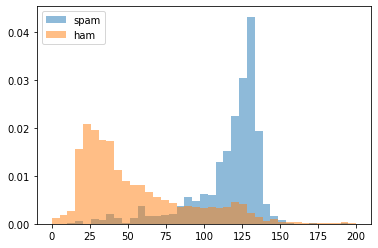

In [66]:
bins = np.linspace(0, 200, 40) 

pyplot.hist(data[data['label'] == "spam"]['body_len'], bins, alpha=0.5, density = True, stacked=True, label="spam")
pyplot.hist(data[data['label'] == "ham"]['body_len'], bins, alpha=0.5,density = True, stacked=True, label='ham')
pyplot.legend(loc="upper left")
pyplot.show()

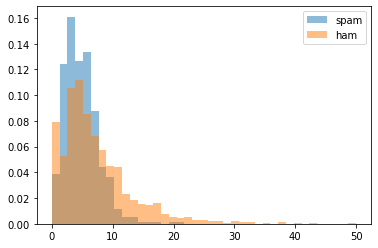

In [67]:
bins = np.linspace(0, 50, 40) 

pyplot.hist(data[data['label'] == "spam"]['punct%'], bins, alpha=0.5, density = True, stacked=True, label="spam")
pyplot.hist(data[data['label'] == "ham"]['punct%'], bins, alpha=0.5,density = True, stacked=True, label='ham')
pyplot.legend(loc="upper right")
pyplot.show()

In [68]:
#Transformations
import pandas as pd
import string

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label','body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


In [69]:
#Plot the two new features

from matplotlib import pyplot
import numpy as np
%matplotlib inline

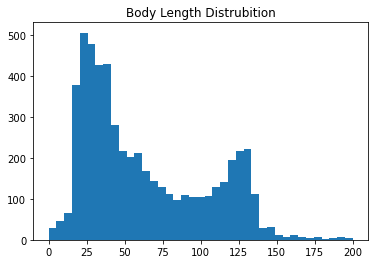

In [70]:
bins = np.linspace(0, 200, 40)   #Start from 0 to 200 and create 40 bins

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distrubition")
pyplot.show()

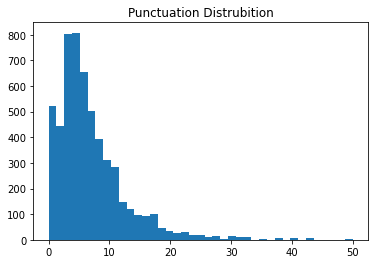

In [71]:
bins = np.linspace(0, 50, 40)   #Start from 0 to 200 and create 40 bins

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation Distrubition")
pyplot.show()

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

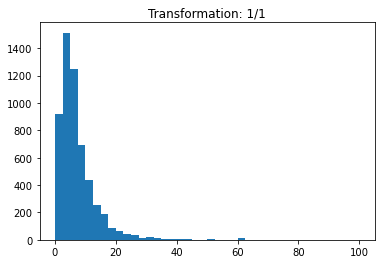

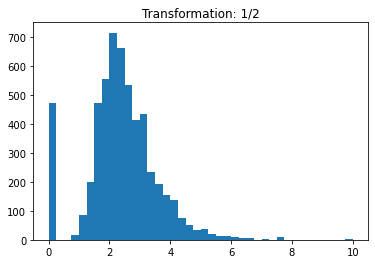

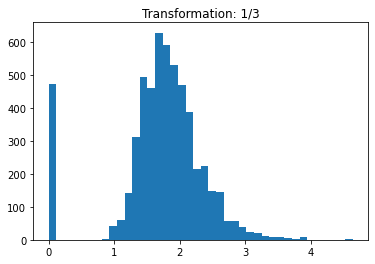

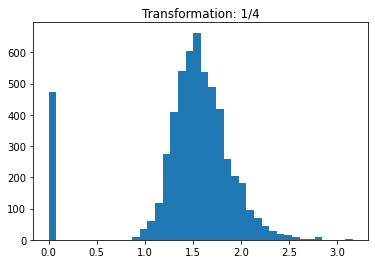

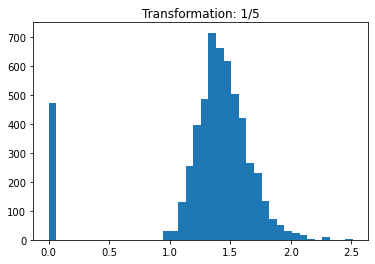

In [72]:
for i in [1,2,3,4,5]:
    pyplot.hist((data['punct%'])**(1/i), bins=40)
    pyplot.title('Transformation: 1/{}'.format(str(i)))
    pyplot.show()

**Random Forest**

Ensemble learning method that constructs a collection of decision trees and then aggregates the predictions of each tree to determine the final prediction.

In [73]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97666068, 0.98025135, 0.97574124, 0.96585804, 0.97214735])

In [75]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [77]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [78]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.0557470539663857, 'body_len'),
 (0.04458512611812864, 1803),
 (0.040233495415148104, 7350),
 (0.03508337702581037, 2031),
 (0.030053768199874927, 3134),
 (0.027583489223341418, 4796),
 (0.01976873329293995, 5988),
 (0.017432183719492417, 392),
 (0.016623216283892548, 2299),
 (0.016162360431898393, 7027)]

In [79]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label="spam", average="binary")

In [80]:
print('Precision: {}, / Recall: {} / Accuracy: {}'.format(round(precision,3),
                                                          round(recall,3),
                                                          round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 1.0, / Recall: 0.686 / Accuracy: 0.961


Precision: 1.0 means **All mail in the spam folder is actually spam.**

Recall: 0.523 means **52.3% of spam mails which came in your inbox are placed in spam box.**

Accuracy: 0.935 means **93.5% of your mails which came in your inbox properly classified as ham or spam.**

**Grid-Search: Exhustively search all parameter combinations in a given grid to determine the best model**

In [81]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [84]:
def train_RF(n_est,depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam',average='binary')
    print('Est: {} / Depth: {} ------ Precision: {} / Recall: {} / Accuracy: {} '.format(n_est, depth, round(precision, 3), 
                                                                                        round(recall, 3),
                                                                                        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [85]:
for n_est in [10,50,100]:
    for depth in [10,20,30,None]:
        train_RF(n_est,depth)

Est: 10 / Depth: 10 ------ Precision: 1.0 / Recall: 0.265 / Accuracy: 0.898 
Est: 10 / Depth: 20 ------ Precision: 0.989 / Recall: 0.568 / Accuracy: 0.939 
Est: 10 / Depth: 30 ------ Precision: 1.0 / Recall: 0.652 / Accuracy: 0.952 
Est: 10 / Depth: None ------ Precision: 1.0 / Recall: 0.761 / Accuracy: 0.967 
Est: 50 / Depth: 10 ------ Precision: 1.0 / Recall: 0.226 / Accuracy: 0.892 
Est: 50 / Depth: 20 ------ Precision: 1.0 / Recall: 0.561 / Accuracy: 0.939 
Est: 50 / Depth: 30 ------ Precision: 1.0 / Recall: 0.716 / Accuracy: 0.961 
Est: 50 / Depth: None ------ Precision: 1.0 / Recall: 0.813 / Accuracy: 0.974 
Est: 100 / Depth: 10 ------ Precision: 1.0 / Recall: 0.258 / Accuracy: 0.897 
Est: 100 / Depth: 20 ------ Precision: 1.0 / Recall: 0.581 / Accuracy: 0.942 
Est: 100 / Depth: 30 ------ Precision: 1.0 / Recall: 0.729 / Accuracy: 0.962 
Est: 100 / Depth: None ------ Precision: 1.0 / Recall: 0.832 / Accuracy: 0.977 


**Exploring parameter settings using GridSearchCV**

In [86]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
from sklearn.model_selection import GridSearchCV

In [89]:
rf = RandomForestClassifier()
param = {'n_estimators' : [10,150,300],
        'max_depth': [30,60,90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,64.524116,0.696996,0.655548,0.046440,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977558,0.976661,0.973944,0.967655,0.971249,0.973413,0.003629,1
11,63.282143,5.876885,0.590579,0.098637,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.974865,0.973944,0.968553,0.970350,0.973054,0.003223,2
10,35.211662,0.792445,0.459671,0.062368,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977558,0.975763,0.973944,0.968553,0.969452,0.973054,0.003511,3
7,35.227876,1.189814,0.519379,0.043270,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.976661,0.974865,0.973944,0.967655,0.969452,0.972515,0.003399,4
5,51.538328,1.513390,0.572921,0.132012,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.975763,0.975763,0.973944,0.967655,0.967655,0.972156,0.003735,5


In [90]:
rf = RandomForestClassifier()
param = {'n_estimators' : [10,150,300],
        'max_depth': [30,60,90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,36.108328,0.508710,0.609486,0.087764,None,150,"{'max_depth': None, 'n_estimators': 150}",0.978456,0.977558,0.973944,0.968553,0.968553,0.973413,0.004246,1
11,62.616444,7.236736,0.609184,0.165350,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975763,0.975763,0.973944,0.967655,0.969452,0.972515,0.003351,2
8,64.180431,0.834654,0.685834,0.116191,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.976661,0.972172,0.973046,0.967655,0.970350,0.971977,0.002981,3
7,33.225410,1.074747,0.497479,0.119626,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.976661,0.975763,0.973046,0.966757,0.967655,0.971976,0.004083,4
4,26.561452,0.847986,0.432249,0.073430,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.977558,0.972172,0.970350,0.965858,0.968553,0.970899,0.003929,5


**Ensemble Method:**

Technique that creates multiple models and then combines them to produce better results than any of the single models individually

**Gradient Boosting:**

Ensemble learnin method thatkes and iterative approach to combining weak learners to create a strong learner by focusing on mistakes of prior iterations.

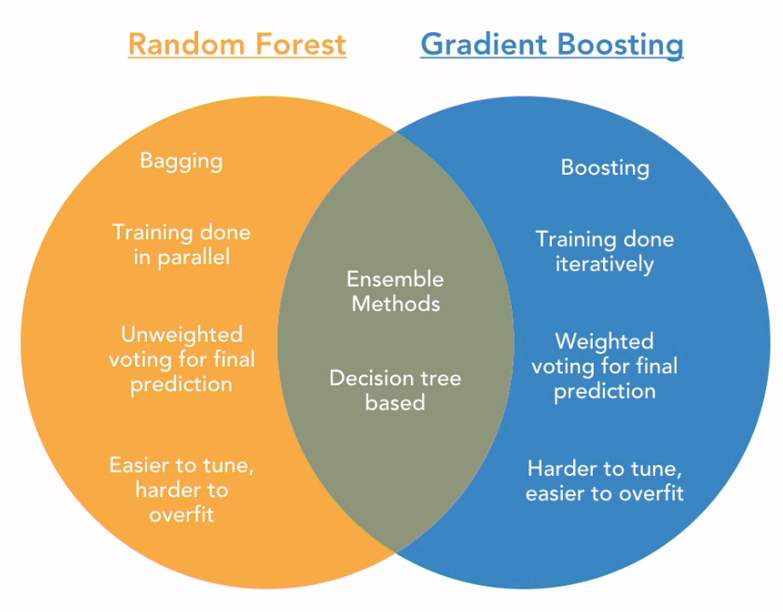

In [93]:
#Build our own Grid-search

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [95]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ------ Precision: {} / Recall: {} / Accuracy: {}'.format(
    est, max_depth, lr, round(precision,3), round(recall,3), round((y_pred==y_test).sum() / len(y_pred),3)))

In [ ]:
for n_est in [50,100,150]:
    for max_depth in [3,7,11,15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

In [96]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4453, 8106)
(1114, 8106)
(4453,)
(1114,)
